In [9]:
%matplotlib inline

import numpy as np
from skimage import measure
import cv2
from matplotlib import pyplot as plt

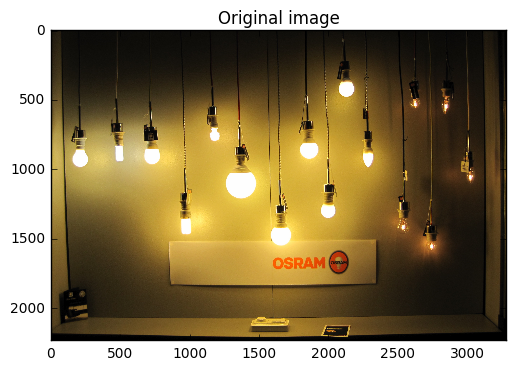

In [4]:
def show_image(img, title="", gray=False):
    # We need to change default BGR to RGB
    if gray:
        new_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    else:
        new_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.title(title)
    plt.imshow(new_img)
    plt.show()

image_path = 'lamps.jpg'

image = cv2.imread(image_path)

show_image(image, title='Original image')

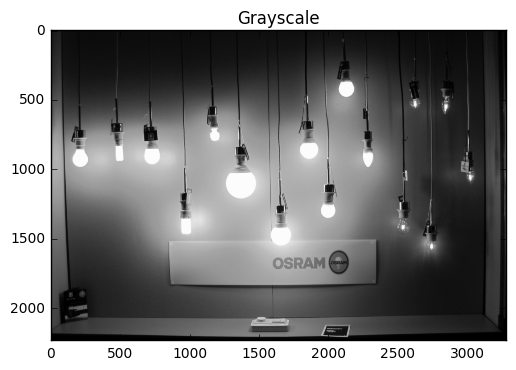

In [5]:
# Convert to grayscale and blur to avoid noise
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# cv2.imwrite("output.jpg", gray)
blurred = cv2.GaussianBlur(gray, (11, 11), 0)
show_image(blurred, title='Grayscale', gray=True)

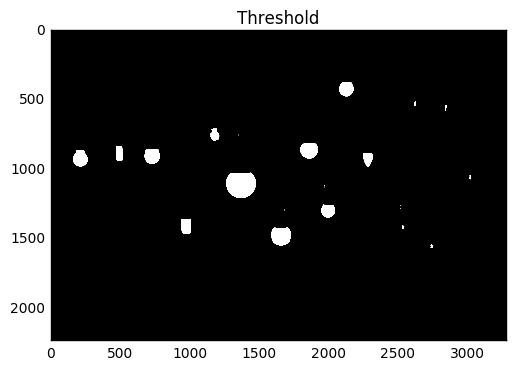

In [6]:
# All pixels with value more than 230 are changed to white
# with rest being assigned as white
thresh = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)[1]
show_image(thresh, title='Threshold', gray=True)

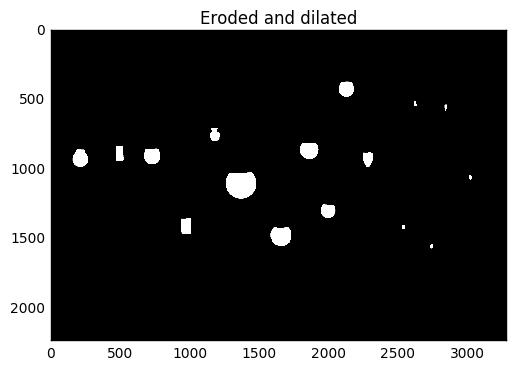

In [7]:
# perform a series of erosions and dilations to remove
# any small blobs of noise from the thresholded image
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=4)

show_image(thresh, title='Eroded and dilated', gray=True)

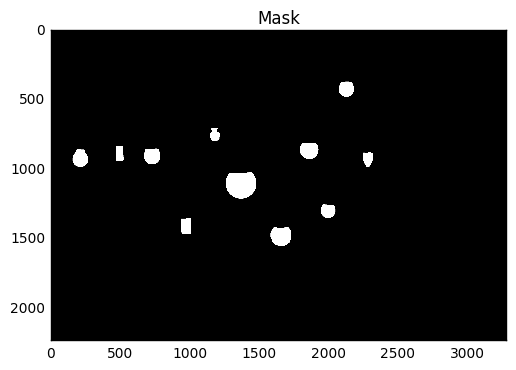

In [40]:
BACKGROUND = 0

# perform a connected component analysis on the thresholded
# image, then initialize a mask to store only the "large"
# components.
# label assigns specific number for each unique region
labels = measure.label(thresh, connectivity=2, background=BACKGROUND)
mask = np.zeros(thresh.shape, dtype="uint8")

# loop over the unique components
for label in np.unique(labels):
    if label == BACKGROUND:
        continue
 
    # otherwise, construct the label mask and count the
    # number of pixels 
    label_mask = np.zeros(thresh.shape, dtype="uint8")
    label_mask[labels == label] = 255
    num_pixels = cv2.countNonZero(label_mask)
    # if the number of pixels in the component is sufficiently
    # large, then add it to our mask of "large blobs"
    if num_pixels > 5000:
        mask = cv2.add(mask, label_mask)

show_image(mask, title='Mask', gray=True)

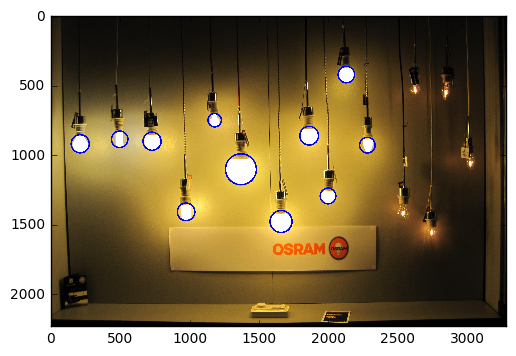

In [69]:
contours = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[1]


for i, c in enumerate(contours):
    (cx, cy), radius = cv2.minEnclosingCircle(c)
    cv2.circle(image, (int(cx), int(cy)), int(radius), (255, 0, 0), 10)

show_image(image)